<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
Dataset Info:
 None

Dataset Description:
             Father          Son
count  1078.000000  1078.000000
mean     67.686827    68.684230
std       2.745827     2.816194
min      59.000000    58.500000
25%      65.800000    66.900000
50%      67.800000    68.600000
75%      69.600000    70.500000
max      75.400000    78.400000

Data Types:
 Father    float64
Son       float64
dtype: object

Checking for missing values:
 Father    0
Son       0
dtype: int64

Correlation Matrix:
           Father       Son
Father  1.000000  0.501163
Son     0.501163  1.000000


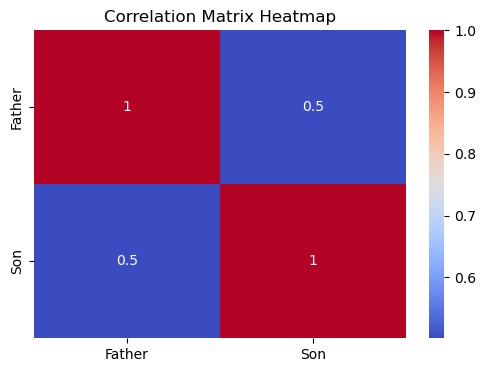

independent Variables:         Father
0     0.365854
1     0.262195
2     0.365854
3     0.414634
4     0.128049
...        ...
1073  0.487805
1074  0.750000
1075  0.780488
1076  0.713415
1077  0.689024

[1078 rows x 1 columns]
Dependent variable: Son
0       0.065327
1       0.236181
2       0.241206
3       0.216080
4       0.291457
          ...   
1073    0.618090
1074    0.492462
1075    0.542714
1076    0.542714
1077    0.427136
Name: Son, Length: 1078, dtype: float64
Prediction: [0.67320059 0.51920174 0.51663509 0.64496747 0.44476895 0.57566798
 0.54230156 0.58593457 0.60646775 0.48840196 0.58080128 0.57566798
 0.662934   0.43193572 0.56283474 0.47556873 0.53203497 0.51150179
 0.59106787 0.46273549 0.46530214 0.57310134 0.47043543 0.59620116
 0.53460162 0.55000151 0.61930099 0.6141677  0.46786878 0.46016884
 0.48070202 0.5063685  0.4524689  0.51920174 0.60390111 0.59876781
 0.46530214 0.49096861 0.5551348  0.60646775 0.58850122 0.5063685
 0.52176838 0.52176838 0.57053469 0.48070

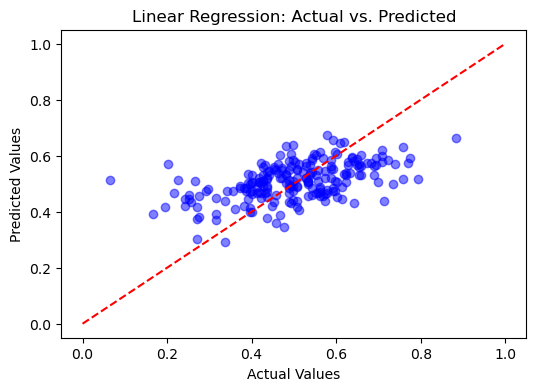

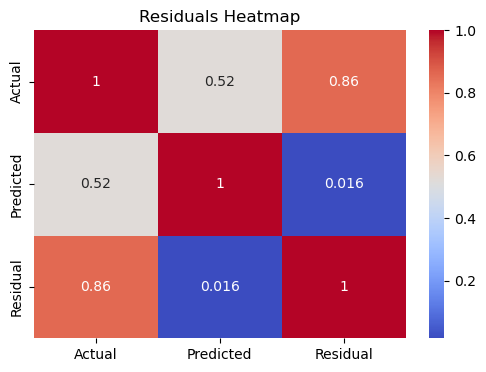

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Load dataset
file_path = "~/Downloads/Pearson.csv"  # Update to the father/son dataset
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())
print("\nData Types:\n", df.dtypes)

# Preprocessing Section and handle missing values
print("\nChecking for missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Removing rows with missing values (Not needed here)

# Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Generate Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") #Small for a small dataset with 2 variables
plt.title("Correlation Matrix Heatmap")
plt.show()



# Normalize Data with the minmax scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split Data labels (Only 2)
X = df_scaled.iloc[:, :-1]  # Father’s height (independent variable)
y = df_scaled.iloc[:, -1]   # Son’s height (dependent variable)
print("independent Variables:",X)
print("Dependent variable:",y.name)
print(y)

# Conduct and Train Linear Regression Model
model = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20 percent in training here
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
print("Prediction:", y_pred)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
cross_val = cross_val_score(model, X, y, cv=5).mean()

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Explained Variance Score:", explained_var)
print("Cross-Validation Score:", cross_val)


# Plotting graphs
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

residuals = y_test - y_pred # residuals and error heatmap that i think helps illustrate the difference of actual and predicted
residuals_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Residual": residuals})

plt.figure(figsize=(6, 4))
sns.heatmap(residuals_df.corr(), annot=True, cmap="coolwarm")
plt.title("Residuals Heatmap")
plt.show()
